Physics 77: Final Project
<br>
Due Date: May 17, 2019
<br>
Names: Rachel Redman, Jiani Chen

<b>About: </b>
<br>
This project is a python script that simulates a game of Blackjack between 2-5 players. In a standard game of Blackjack, each player starts with two cards. The player decides whether to draw another card (or <i>hit</i>) depending on whether the sum of the values of the hand adds up to 21 (or <i>Blackjack</i>). The goal is to have the hand sum up to as close to 21 as possible but without going 21 (which is a <i>bust</i>). The simulation shuffles a standard deck of cards and each player is controlled by the computer AI. The computer AI uses a card counting system that allows it to calculate the probability of reaching Blackjack each round and uses that probability to decide whether it's safe to take a hit or not. 
<br>

This simulation allows the user to analyze the outcomes of a game of Blackjack with a desired number of players. The user can see the printed results of one game of Blackjack or disable the printed text, allowing the user to analyze the results of multiple games without effecting efficiency. For each game, the user can change the number of players, number of rounds per game, and the risk factor of taking a hit. The risk factor is a value from 0-1, where it represents the minimum probability for the next hit taken to sum up to 21. Thus a lower risk factor indicates the riskier the play. 

In [1]:
# Standard premable
import random as rand
import numpy as np
import matplotlib.pyplot as plt

<b>Game setup:</b>
<br>
`deck()` 
<br>
&emsp;Generates a standard deck of cards and the associated value of each card.
<br>
`shuffle_deck()`
<br>
&emsp;Shuffles a standard deck of cards using `random.shuffle`
<br>
`generate_hand()`
<br>
&emsp;Takes two cards from the deck and gives it to the player's hand.
<br>
`give_players()`
<br>
&emsp;Gives each player a hand depending on the number of players in the game.

In [2]:
def generate_deck():
    """function returns list of name and value for each card in deck, no inputs"""
    suits = ['hearts', 'clubs', 'diamonds', 'spades']
    numbers = ['2','3','4','5','6','7','8','9','10','jack','queen','king','ace']
    deck = []
    for s in suits:
        for n in numbers:
            deck.append([n +' '+ s])
    values = [2,3,4,5,6,7,8,9,10,10,10,10,1]*4
    for i,item in enumerate(deck):
        item.append(values[i])
    return deck

def shuffle_deck(deck):
    """input deck of cards, returns deck in random order"""
    rand.shuffle(deck)
    return deck

def generate_hands(deck):
    """input shuffled deck, returns a hand for one player and whatever is left in deck"""
    hand = []
    hand.append(deck[0])
    hand.append(deck[1])
    deck.remove(deck[0])
    deck.remove(deck[0])
    return hand, deck

def give_players(num_players, deck):
    """input number of players, shuffled deck, returns list of the hands and what is left in deck"""
    hands = []
    for n in range(num_players):
        hand, deck = generate_hands(deck)
        hands.append(hand)
    return hands, deck

In [3]:
deck = shuffle_deck(generate_deck())
print("A shuffled deck looks like this:\n", deck)
hands, deck = give_players(3, deck)
print("\nThe hands of 3 players look like this:\n", hands)
print('\nAnd the deck updates to remove those cards:\n The length of the current deck is', len(deck))

A shuffled deck looks like this:
 [['5 diamonds', 5], ['8 hearts', 8], ['8 clubs', 8], ['2 diamonds', 2], ['7 diamonds', 7], ['3 diamonds', 3], ['3 spades', 3], ['9 diamonds', 9], ['king spades', 10], ['5 spades', 5], ['3 clubs', 3], ['7 spades', 7], ['10 clubs', 10], ['8 diamonds', 8], ['queen spades', 10], ['4 hearts', 4], ['2 spades', 2], ['7 clubs', 7], ['10 spades', 10], ['7 hearts', 7], ['6 hearts', 6], ['10 diamonds', 10], ['10 hearts', 10], ['king diamonds', 10], ['queen diamonds', 10], ['4 clubs', 4], ['ace diamonds', 1], ['5 hearts', 5], ['6 diamonds', 6], ['jack diamonds', 10], ['9 hearts', 9], ['4 spades', 4], ['queen clubs', 10], ['queen hearts', 10], ['5 clubs', 5], ['4 diamonds', 4], ['9 spades', 9], ['jack clubs', 10], ['6 spades', 6], ['2 hearts', 2], ['ace hearts', 1], ['3 hearts', 3], ['6 clubs', 6], ['king hearts', 10], ['king clubs', 10], ['8 spades', 8], ['9 clubs', 9], ['ace clubs', 1], ['jack spades', 10], ['2 clubs', 2], ['jack hearts', 10], ['ace spades', 1]]


<b>Turn Process:</b>
<br>
`count()`
<br>
&emsp;Returns a list of sorted values of the current deck
<br>
`hand_values()`
<br>
&emsp;Returns all possible sums of cards in a hand
<br>
`hit()`
<br>
&emsp;Performs a hit. (Adds card to hand, removes card from deck, remove unknown value of card)
<br>
`unknown()`
<br>
&emsp;Returns a list of cards that is hidden to the player.
<br>
`probability()`
<br>
&emsp;Finds the probability of values summing below 21 out of the current unknown cards.
<br>
`turn()`
<br>
&emsp;Simulates a turn of a player during a round.


In [4]:
def count(deck):
    values = []
    for i in deck:
        values.append(i[1]) #purposly skipping 11 for aces
    return sorted(values)

def hand_values(hand):
    """Accounts for all combinations of Aces in a hand."""
    s = [0]
    for i in hand:
        s[0] += i[1]
    aces_count = 0
    for i in hand:
        if i[1] == 1:
            aces_count += 1
    if aces_count >= 1:
        s.append(s[0]+10)
        if aces_count >= 2:
            s.append(s[0]+20)
            if aces_count >= 3:
                s.append(s[0]+30)
                if aces_count == 4:
                    s.append(s[0]+40)
    return s

def hit(hand, deck, unknown):
    hand.append(deck[0])
    unknown.remove(deck[0][1])
    deck.remove(deck[0])
    return hand, deck, unknown

def give_unknowns(hands, deck):
    unknowns = []
    for i in range(len(hands)):
        unknowns.append(count(deck))
        
    for num_players in range(len(hands)): #num_player refers to player we want
        for player,hand in enumerate(hands): #player refers to other player
            if num_players != player:
                unknowns[num_players].append(hand[0][1])
    return unknowns

def probability(sum_, unknown, prob):
    count = 0
    for value in unknown:
        if value + sum_ <= 21:
            count += 1
    if count/len(unknown) > prob:
        return True
    else:
        return False  
    
def turn(player, hands, deck, unknowns, prob_array, prt = False):
    sums = hand_values(hands[player])
    while sums[0] < 21: 
        if prt == True:
            print('Player', player,'turn:\n  Current sum:',sums[0], '\n  Current length of deck:', len(deck))
        for value in sums:
            if value == 21:
                return 'blackjack', deck, sums
        if probability(sums[0], unknowns[player], prob_array[player]) == False:
            return 'stand',deck, sums
        else: 
            hands[player], deck, unknowns[player] = hit(hands[player], deck, unknowns[player])
            sums = hand_values(hands[player])  
    else:
        return 'bust',deck, sums

In [ ]:
prob_array = [0.5 for n in range(len(hands))]
unknowns = give_unknowns(hands, deck)
result, deck, sums = turn(1, hands, deck, unknowns, prob_array, prt = True)
print('Player 1 turn result:', result, 'with a hand value of', sums[0])

Player 1 turn:
  Current sum: 10 
  Current length of deck: 46
Player 1 turn:
  Current sum: 13 
  Current length of deck: 45
Player 1 turn result: bust with a hand value of 22


<b>Results:</b>
<br>
`generate_round()`
<br>
&emsp;Simulates one round of a game, putting together the turns of the selected number of players.
<br>
`round_results()`
<br>
&emsp;Returns the results of a round: which player won and what the value of their hand was.
<br>
`game()`
<br>
&emsp;Simulates a game of blackjack, returning the winner of the game and how many points they had when they won. An option is included the turn off the results text.

In [ ]:
def generate_round(deck, n_players, prob_array):
    hands, deck = give_players(n_players, deck)
    un = give_unknowns(hands, deck)
    outcomes = []
    all_sums = []
    for i in range(n_players):
        outcome, deck, sums = turn(i, hands, deck, un, prob_array)
        outcomes.append(outcome)
        all_sums.append(sums)
    blackjack = []
    stand_values = []
    for player, outcome in enumerate(outcomes):
        if outcome == 'blackjack':
            blackjack.append(player)
    if len(blackjack) == 0:
        high_value = 0
        for i,sums in enumerate(all_sums):
            if outcomes[i] == 'stand':
                for value in sums:
                    if value > high_value and value < 21:
                        high_value = value
        for i,sums in enumerate(all_sums):
            for value in sums:
                if value == high_value:
                    stand_values.append(i)
        return outcomes, deck, stand_values, high_value
    if len(blackjack) == 0 and len(stand_values) == 0:
        return outcomes, deck, [], 0
    return outcomes, deck, blackjack, 21

def round_results(outcome, winners, winning_value):
    str_winners = [str(i) for i in winners]
    
    for i in range(len(outcome)):
        print('Player', i, ":", outcome[i])
    if len(winners) == 1:
        print('Player', ', '.join(str_winners), 'wins with a hand value of', winning_value)
    elif len(winners) == 0:
        print('All players bust')
    else:
        print('Players',', '.join(str_winners), 'tie with a hand value of', winning_value)

In [ ]:
def game(num_players, prob_array, num_rounds= 10, print_bool = True):
    deck = shuffle_deck(generate_deck())
    points = [0 for i in range(num_players)]
    count = 0
    while count < num_rounds:
        count += 1
        outcome, deck, winners, winning_value = generate_round(deck, num_players, prob_array)
        
        if print_bool == True:
            print('\nResults for round {}'.format(count))
            round_results(outcome, winners, winning_value)
        
        for i in winners:        
            if winning_value == 21:
                if len(winners) == 1:
                    points[winners[0]] += 2
                else:
                    points[i] += 2/len(winners)
            elif winning_value < 21:
                if len(winners) == 1:
                    points[winners[0]] += 1
                else:
                    points[i] += 1/len(winners)
        
        print_points = []
        for i in points:
            point = float('%.3f'%(i))
            print_points.append(point)
            
        if print_bool == True:
            print('Current points:', print_points)
            
        if len(deck) < 6*num_players:
            deck = shuffle_deck(generate_deck())
    
    game_winners = []
    high_points = max(points)
    for i, point in enumerate(points):
        if point == high_points:
            game_winners.append(str(i))
    
    print_highpoint = float('%0.3f'%high_points)
    
    if print_bool == True:
        print('The winner(s):',', '.join(game_winners),'with',print_highpoint,'points')
    
    return game_winners, np.array(points)

In [ ]:
#by default, a game runs through 10 rounds
print('An example game looks like this:')
n_players = 5
prob_array = [0.5 for n in range(n_players)]
_, __ = game(n_players, prob_array)

An example game looks like this:

Results for round 1
Player 0 : blackjack
Player 1 : stand
Player 2 : stand
Player 3 : stand
Player 4 : stand
Player 0 wins with a hand value of 21
Current points: [2.0, 0.0, 0.0, 0.0, 0.0]

Results for round 2
Player 0 : stand
Player 1 : stand
Player 2 : stand
Player 3 : bust
Player 4 : blackjack
Player 4 wins with a hand value of 21
Current points: [2.0, 0.0, 0.0, 0.0, 2.0]

Results for round 3
Player 0 : stand
Player 1 : stand
Player 2 : bust
Player 3 : stand
Player 4 : stand
Player 1 wins with a hand value of 19
Current points: [2.0, 1.0, 0.0, 0.0, 2.0]

Results for round 4
Player 0 : stand
Player 1 : stand
Player 2 : stand
Player 3 : stand
Player 4 : stand
Player 0 wins with a hand value of 20
Current points: [3.0, 1.0, 0.0, 0.0, 2.0]

Results for round 5
Player 0 : stand
Player 1 : stand
Player 2 : stand
Player 3 : stand
Player 4 : stand
Players 0, 1 tie with a hand value of 20
Current points: [3.5, 1.5, 0.0, 0.0, 2.0]

Results for round 6
Player 

In [ ]:
def main():
    rules_text = """
    This project is a python script that simulates a game of Blackjack between 2-5 players. In a standard game 
    of Blackjack, each player starts with two cards. The player decides whether to draw another card (or hit) 
    depending on whether the sum of the values of the hand adds up to 21 (or Blackjack). The goal is to have the 
    hand sum up to as close to 21 as possible but without going 21 (which is a bust). The simulation shuffles 
    a standard deck of cards and each player is controlled by the computer AI. The computer AI uses a card counting 
    system that allows it to calculate the probability of reaching Blackjack each round and uses that probability to 
    decide whether it's safe to take a hit or not. \n
    This simulation allows the user to analyze the outcomes of a game of Blackjack with a desired number of players. 
    The user can see the printed results of one game of Blackjack or disable the printed text, allowing the user to 
    analyze the results of multiple games without effecting efficiency. For each game, the user can change the number 
    of players, number of rounds per game, and the risk factor of taking a hit. The risk factor is a value from 0-1, 
    where it represents the minimum probability for the next hit taken to sum up to 21. Thus a lower risk factor 
    indicates the riskier the play. 

    """
    rules = input('This is a Blackjack simulator. If you wish to read the rules, enter "Y". \nIf not enter any other character:  ')
    if rules == 'Y':
        print(rules_text)
    
    n_players = input('Input the number of players (2-5): ')
    n_players = int(n_players)
    print('Now enter the risk factor for each player. (Value between 0 to 1) ')
    risks = []
    for n in range(n_players):
        risk = input('Risk factor for player {}: '.format(n))
        risk = float(risk)
        risks.append(risk)
    n_rounds = input('How many rounds in the game? ')
    print('\nThe simulation will now begin...')
    game(n_players, risks, int(n_rounds))
    
main()

This is a Blackjack simulator. If you wish to read the rules, enter "Y". 
If not enter any other character:  y
Input the number of players (2-5): 2
Now enter the risk factor for each player. (Value between 0 to 1) 
Risk factor for player 0: .3
Risk factor for player 1: .3
How many rounds in the game? 3

The simulation will now begin...

Results for round 1
Player 0 : bust
Player 1 : stand
Player 1 wins with a hand value of 20
Current points: [0.0, 1.0]

Results for round 2
Player 0 : stand
Player 1 : bust
Player 0 wins with a hand value of 20
Current points: [1.0, 1.0]

Results for round 3
Player 0 : stand
Player 1 : bust
Player 0 wins with a hand value of 19
Current points: [2.0, 1.0]
The winner(s): 0 with 2.0 points


### <b>Statistics</b>

In a casino game of Blackjack, the dealer usually goes last. Below shows a histogram of comparing the total wins of a 5 player game

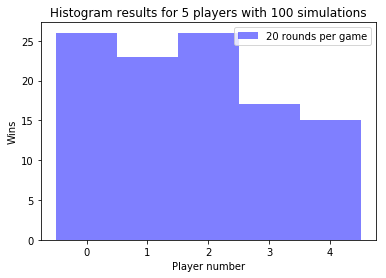

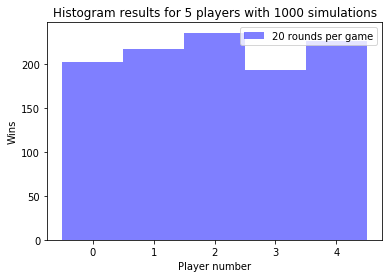

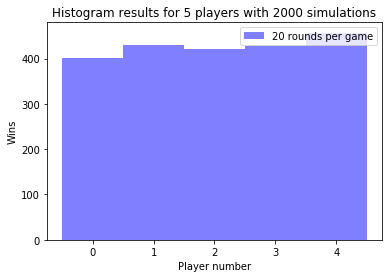

In [ ]:
n_players = 5
prob_array = [0.5 for n in range(n_players)]
simulation_times = 2000
num_rounds = 50

def plot_histogram(n_players, prob_array, num_rounds, simulation_times):
    
    winning_players = []
    bins = np.arange(-0.5, n_players+0.5, 1)
    title = 'Histogram results for ' + str(n_players) + ' players with ' + str(simulation_times) + ' simulations'
    legend = str(num_rounds) + ' rounds per game'
    
    for n in range(simulation_times):
        winners, _ = game(n_players, prob_array, num_rounds, False)
        for player in winners:
            winning_players.append(player)

    n, b, patches = plt.hist(sorted(winning_players), bins, facecolor='blue', alpha=0.5)
    plt.title(title)
    plt.legend([legend], loc = 'upper right')
    plt.xlabel('Player number')
    plt.ylabel('Wins')
    plt.show()

plot_histogram(n_players, prob_array, 20, 100)
plot_histogram(n_players, prob_array, 20, 1000)
plot_histogram(n_players, prob_array, 20, 2000)

We can also analyze how the points are distributed between each player

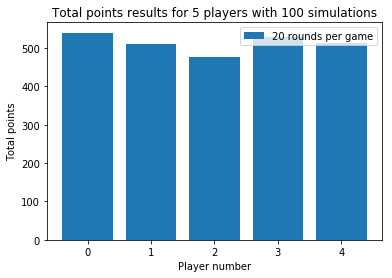

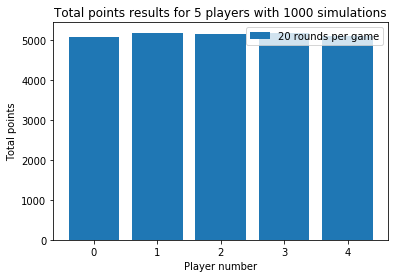

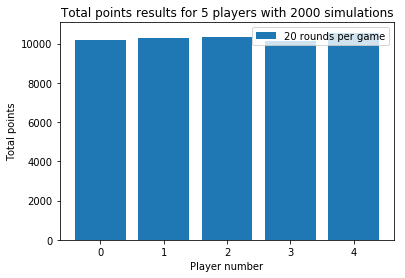

In [ ]:
n_players = 5
prob_array = [0.5 for n in range(n_players)]
simulation_times = 1000
num_rounds = 10

def plot_points(n_players, prob_array, num_rounds, simulation_times):
    
    winning_players = []
    total_points = np.zeros(n_players)
    x = np.arange(0, n_players, 1)
    title = 'Total points results for ' + str(n_players) + ' players with ' + str(simulation_times) + ' simulations'
    legend = str(num_rounds) + ' rounds per game'
    
    for n in range(simulation_times):
        _, points = game(n_players, prob_array, num_rounds, False)
        total_points = points + total_points
        
    plt.bar(x,total_points)
    plt.title(title)
    plt.legend([legend], loc = 'upper right')
    plt.xlabel('Player number')
    plt.ylabel('Total points')
    plt.show()
    
plot_points(n_players, prob_array, 20, 100)
plot_points(n_players, prob_array, 20, 1000)
plot_points(n_players, prob_array, 20, 2000)

Notice that there isn't a dramatic diffference between the points and wins distribution of each player. We can make an alternative analaysis on the points differences compared to the mean of the other players to see if going last has an advantage.

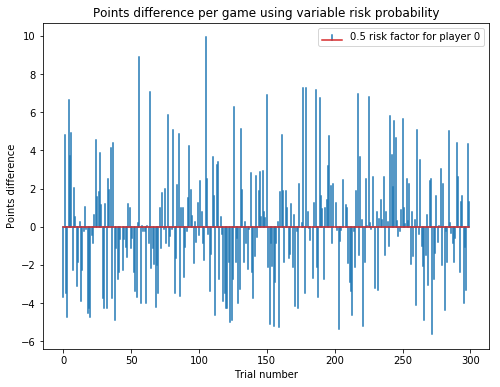

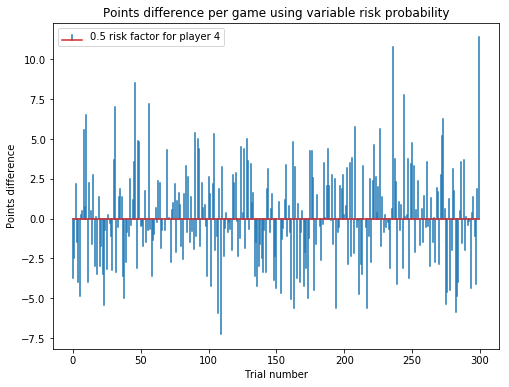

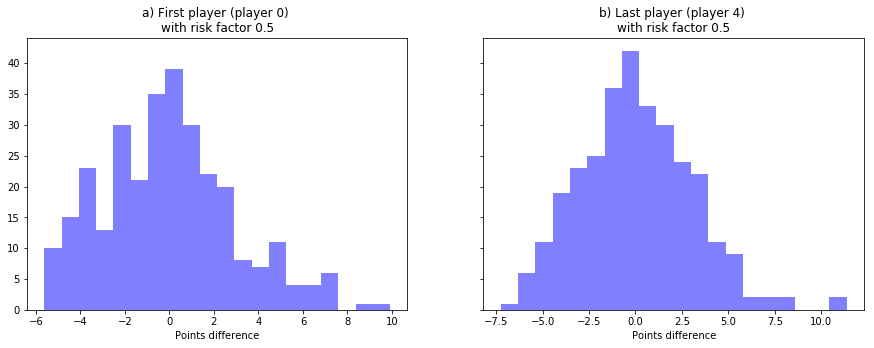

In [ ]:
def calculate_difference(array, test_num):
    
    average = 0
    if test_num == 0:
        for i in range(1,len(array)):
            average = average + array[i]

        average = average/(len(array)-1)
        difference = array[0] - average

        return difference
    if test_num == 4:
        for i in range(0,len(array)-1):
            average = average + array[i]

        average = average/(len(array)-1)
        difference = array[4] - average

        return difference

def plot_differences(risk, n_trials, n_players, n_rounds, test_num):
    
    prob_array = np.array([0.5,0.5,0.5,0.5,0.5])
    prob_array[test_num] = risk

    legend = str(risk) + ' risk factor for player ' + str(test_num)
    trials = []
    
    for i in range(n_trials):
        _, points = game(n_players, prob_array, n_rounds, False)
        trials.append(points)

    differences = [calculate_difference(array, test_num) for array in trials]

    plt.figure(figsize = (8,6))
    plt.stem(differences, markerfmt=' ')
    plt.title('Points difference per game using variable risk probability')
    plt.legend([legend])
    plt.xlabel('Trial number')
    plt.ylabel('Points difference')
    plt.show()
    
    return differences

# Example output of results of player 0, where everyone takes a 0.5 risk factor
difference0 = plot_differences(0.50, 300, 5, 20, 0)
difference4 = plot_differences(0.50, 300, 5, 20, 4)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.hist(difference0, 20, facecolor='blue', alpha=0.5)
ax1.set_title('a) First player (player 0) \nwith risk factor 0.5')
ax1.set_xlabel('Points difference')
ax2.hist(difference4, 20, facecolor='blue', alpha=0.5)
ax2.set_title('b) Last player (player 4) \nwith risk factor 0.5')
ax2.set_xlabel('Points difference')
plt.show()

From the difference distribution, there appears to be a slight advantage for the player going last compared to the player going first.

<b> Changing probabilities </b>
<br>
In our game, we've also implemented a "risk" system where each player can take a higher risk when they want to make a hit or not. In the simulations above, the risk factor is at 50%, which the player takes a new card, there is a 50% chance a player won't bust. This means the lower the precentage, the riskier the play.
<br>
Since our simulation showed that the order of the player isn't a significant difference, we can safely run tests on how changing the risk factor of one player will affect their win rate. Below, we have changed the risk factor for the first player and compared the difference of the points of the first player compared to the average of the points of the other players. 
<br>
Below shows changing the risk factor for the first player then the last player to 0.45 in a 5 player game.

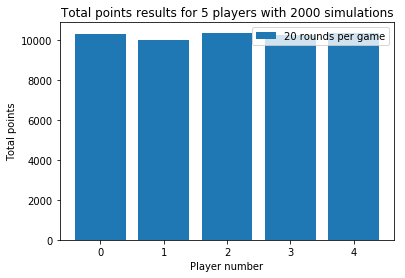

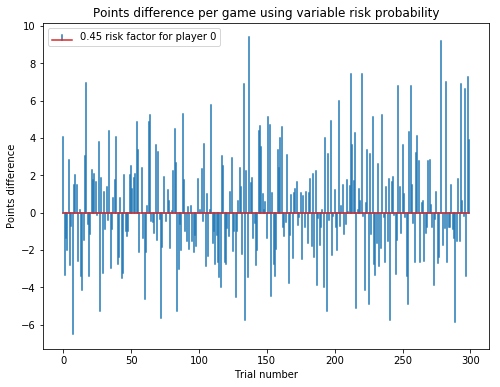

In [ ]:
prob_array = [0.45,0.5,0.5,0.5,0.5]
plot_points(n_players, prob_array, 20, 2000)  
diff0 = plot_differences(0.45, 300, 5, 20, 0)

In [ ]:
prob_array = np.array([0.5,0.5,0.5,0.5,0.45])
plot_points(n_players, prob_array, 20, 2000)
diff4 = plot_differences(0.45, 300, 5, 20, 4)

Notice that the distribution shows a slight shift to the right for the player going first, indicating a slight advantage when making riskier plays.

In [ ]:
# Distribution results of changing risk factors of player 0 and player 4.

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.hist(diff0, 20, facecolor='blue', alpha=0.5)
ax1.set_title('a) First player (player 0) \nwith risk factor 0.45')
ax1.set_xlabel('Points difference')
ax2.hist(diff4, 20, facecolor='blue', alpha=0.5)
ax2.set_title('b) Last player (player 4) \nwith risk factor 0.45')
ax2.set_xlabel('Points difference')
plt.show()

It might also be interesting to see if making a less risky play makes a difference. Below shows the results of changing the risk factor to 0.55 for the first player then for the last player. 

In [ ]:
prob_array = np.array([0.55,0.5,0.5,0.5,0.5])
diff0_ = plot_differences(0.55, 300, 5, 20, 0)

prob_array = np.array([0.5,0.5,0.5,0.5,0.55])
diff4_ = plot_differences(0.55, 300, 5, 20, 4)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.hist(diff0_, 20, facecolor='blue', alpha=0.5)
ax1.set_title('a) First player (player 0) \nwith risk factor 0.55')
ax1.set_xlabel('Points difference')
ax2.hist(diff4_, 20, facecolor='blue', alpha=0.5)
ax2.set_title('b) Last player (player 4) \nwith risk factor 0.55')
ax2.set_xlabel('Points difference')
plt.show()

<b>Conclusion</b>
<br>
There are a lot more analysis that can be made and using the simulation. This notebook only shows some examples. There can also be futher improvements that can be made into the simulation, but I hope this has been useful for any readers.